In [2]:
# 01_data_exploration.py
# Load and explore the World Happiness Report dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/WHR-2024-5CS037.csv")

# Display first 10 rows
print("First 10 rows:")
print(df.head(10), "\n")

# Shape of dataset
df.shape

# Columns and data types

df.dtypes


# Missing values
print("Missing values per column:")
df.isnull().sum()


First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.72

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [3]:
mean=df["score"].mean()
median=df["score"].median()
std=df["score"].std()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)

Mean: 5.52758041958042
Median: 5.785
Std Dev: 1.1707165099442995


In [4]:

# Happiest and unhappiest countries
happiest = df.loc[df["score"].idxmax(), "Country name" ]
unhappiest = df.loc[df["score"].idxmin(), "Country name"]
print("Happiest country:", happiest)
print("Unhappiest country:", unhappiest, "\n")

# Filter score > 7.5 and sort by GDP
filtered = df[df["score"] > 7.5].sort_values("Log GDP per capita", ascending=False).head(10)
print("Top 10 countries with score > 7.5 sorted by GDP:")
print(filtered[["Country name", "score", "Log GDP per capita"]])


Happiest country: Finland
Unhappiest country: Afghanistan 

Top 10 countries with score > 7.5 sorted by GDP:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


In [5]:
# 03_categorization.py


def categorize(score):
    if score < 4:
        return "Low"
    elif score <= 6:
        return "Medium"
    else:
        return "High"

df["Happiness_Category"] = df["score"].apply(categorize)

print(df[["Country name", "score", "Happiness_Category"]].head(15))

# Save categorized dataset
df.to_csv("WHR_with_category.csv", index=False)


   Country name  score Happiness_Category
0       Finland  7.741               High
1       Denmark  7.583               High
2       Iceland  7.525               High
3        Sweden  7.344               High
4        Israel  7.341               High
5   Netherlands  7.319               High
6        Norway  7.302               High
7    Luxembourg  7.122               High
8   Switzerland  7.060               High
9     Australia  7.057               High
10  New Zealand  7.029               High
11   Costa Rica  6.955               High
12       Kuwait  6.951               High
13      Austria  6.905               High
14       Canada  6.900               High


/tmp/ipython-input-3209821611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="Country name", data=top10, palette="viridis")


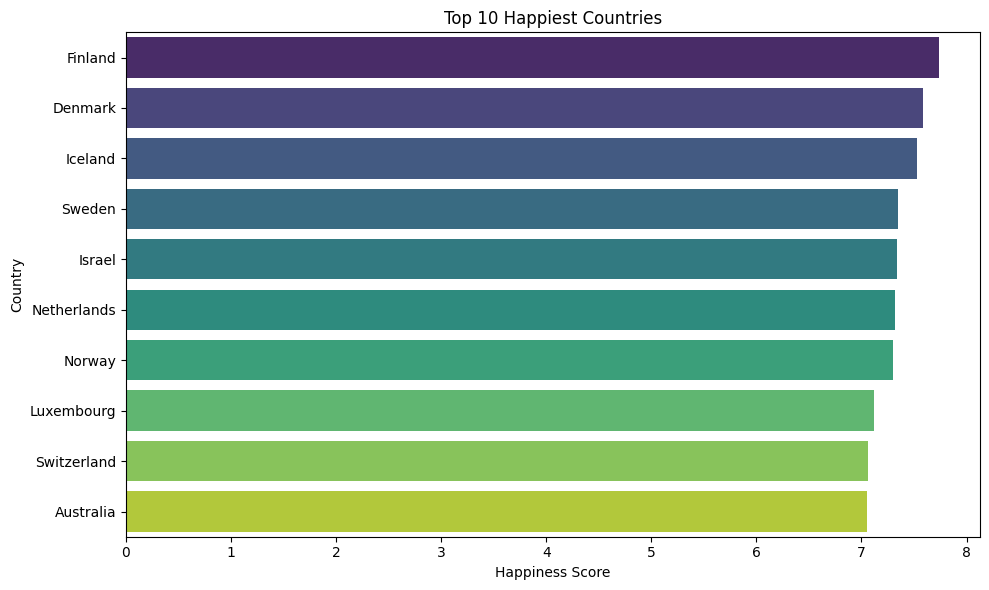

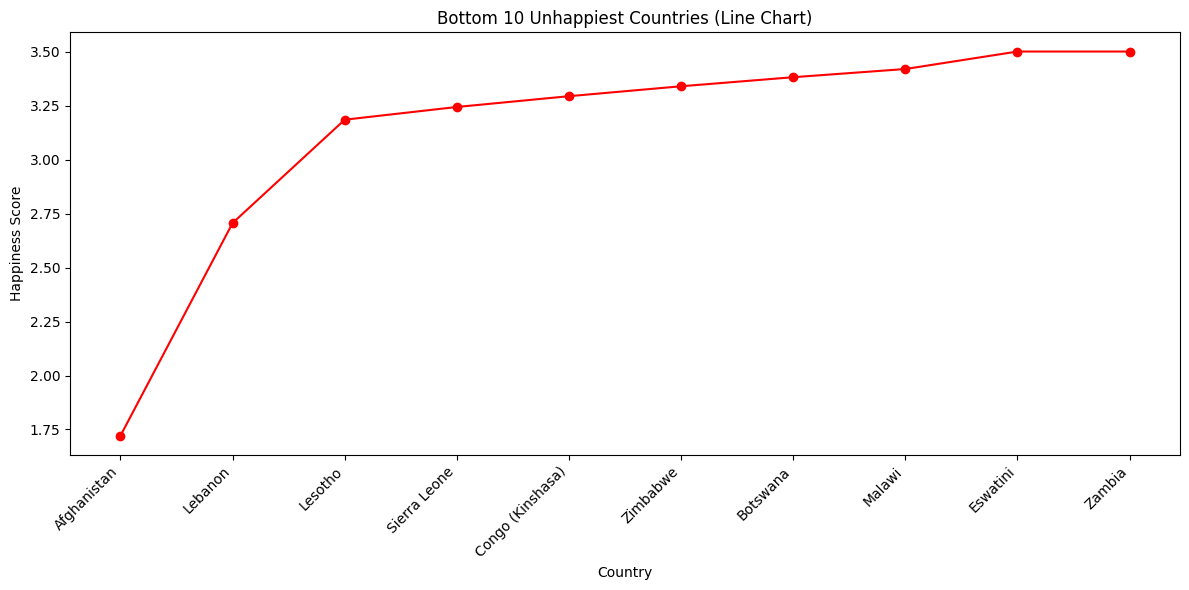

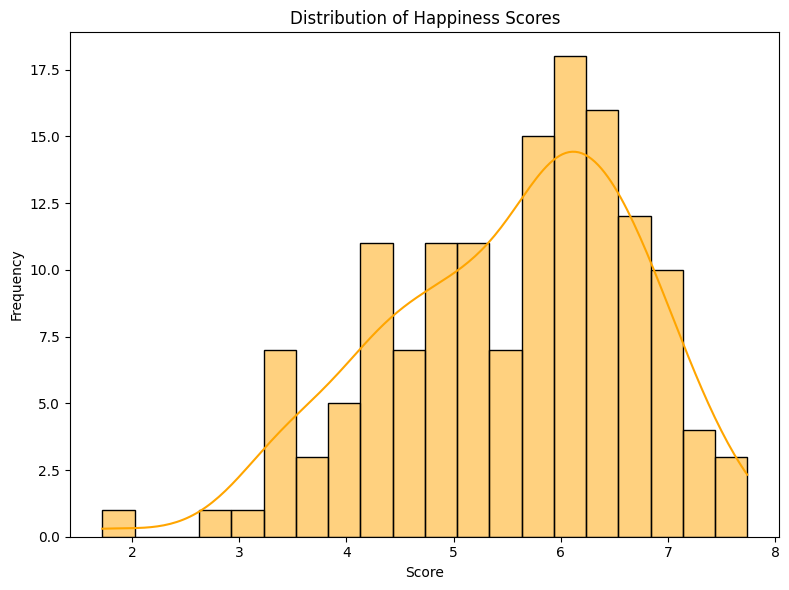

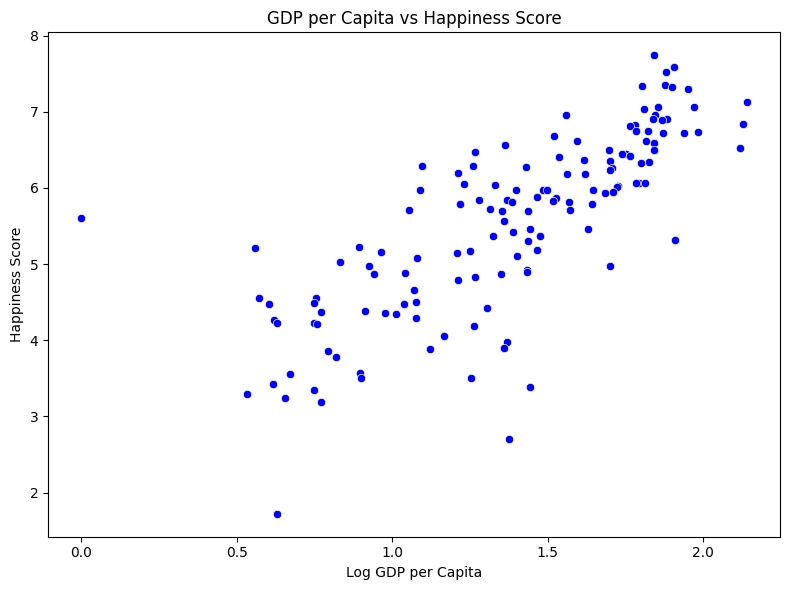

In [6]:


# Convert numeric columns safely
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df["Log GDP per capita"] = pd.to_numeric(df["Log GDP per capita"], errors="coerce")

# Top 10 happiest countries (bar chart)
top10 = df.sort_values(by="score", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="score", y="Country name", data=top10, palette="viridis")
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()   # <-- shows figure

# Bottom 10 unhappiest countries (line chart)
bottom10 = df.sort_values(by="score", ascending=True).head(10)
plt.figure(figsize=(12, 6))
xpos = range(len(bottom10))
plt.plot(xpos, bottom10["score"], marker="o", color="red")
plt.xticks(xpos, bottom10["Country name"], rotation=45, ha="right")
plt.title("Bottom 10 Unhappiest Countries (Line Chart)")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

# Histogram of score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["score"].dropna(), bins=20, kde=True, color="orange")
plt.title("Distribution of Happiness Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter plot: GDP vs. Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Log GDP per capita",
    y="score",
    data=df.dropna(subset=["Log GDP per capita", "score"]),
    color="blue"
)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()


In [7]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Sri Lanka"]
sa_df = df[df["Country name"].isin(south_asian_countries)]
print(sa_df[["Country name", "score", "Log GDP per capita"]])

    Country name  score  Log GDP per capita
92         Nepal  5.158               0.965
107     Pakistan  4.657               1.069
125        India  4.054               1.166
127    Sri Lanka  3.898               1.361
128   Bangladesh  3.886               1.122
142  Afghanistan  1.721               0.628


In [8]:
sa_df.to_csv("South_asia.csv", index=False)

In [9]:
for col in ['Log GDP per capita', 'Social support', 'Healthy life expectancy']:
  sa_df['Composite Score'] = (
    0.40 * sa_df['Log GDP per capita'] +
    0.30 * sa_df['Social support'] +
    0.30 * sa_df['Healthy life expectancy']
)

print(sa_df[['Country name', 'Composite Score']])

    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


/tmp/ipython-input-3880277264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_df['Composite Score'] = (


In [10]:
df.columns


Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness_Category'],
      dtype='object')

In [11]:
sa_ranked = sa_df.dropna(subset=['Composite Score']).sort_values('Composite Score', ascending=False)
print(sa_ranked[['Country name', 'Composite Score']])


    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


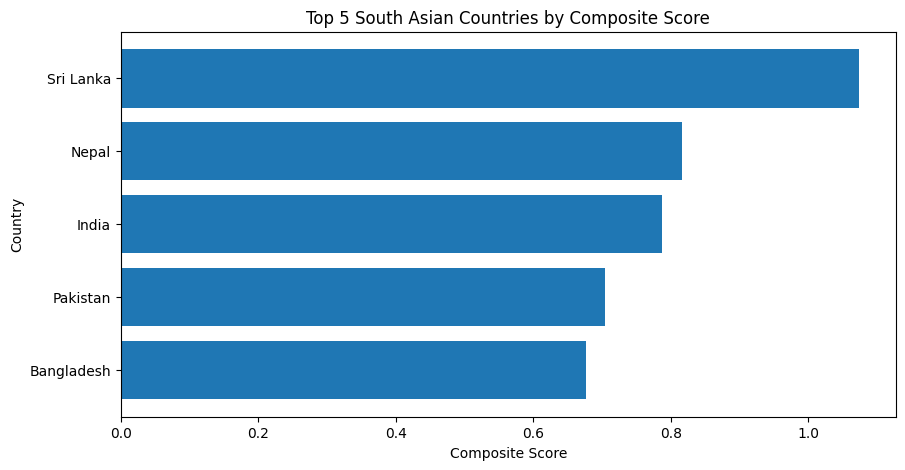

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/AI/WHR-2024-5CS037.csv")

south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India",
              "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

sa_df = df[df['Country name'].isin(south_asia)].copy()

sa_df['Composite Score'] = (
    0.40 * sa_df['Log GDP per capita'] +
    0.30 * sa_df['Social support'] +
    0.30 * sa_df['Healthy life expectancy']
)

top5 = sa_df.sort_values(by='Composite Score', ascending=False).head(5)

plt.figure(figsize=(10, 5))
plt.barh(top5['Country name'], top5['Composite Score'])
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()


In [13]:
for col in ['score', 'Log GDP per capita']:
    Q1 = sa_df[col].quantile(0.25)
    Q3 = sa_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = sa_df[(sa_df[col] < lower) | (sa_df[col] > upper)][['Country name', col]]
    print(f"Outliers in {col}:\n{outlier_rows}\n")


Outliers in score:
    Country name  score
142  Afghanistan  1.721

Outliers in Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628



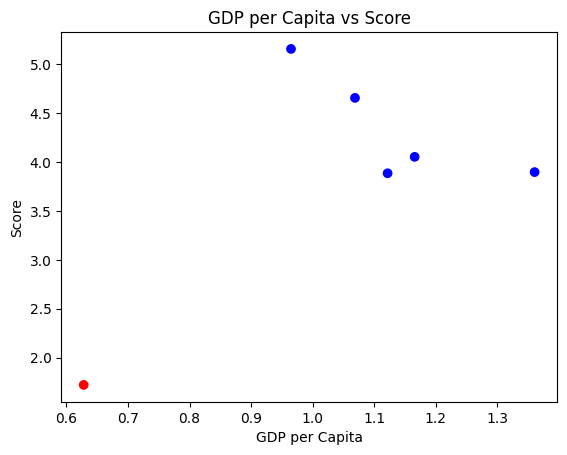

In [14]:

Q1 = sa_df[['Log GDP per capita','score']].quantile(0.25)
Q3 = sa_df[['Log GDP per capita','score']].quantile(0.75)
IQR = Q3 - Q1

sa_df['Outlier'] = (
    (sa_df['Log GDP per capita'] < Q1['Log GDP per capita'] - 1.5*IQR['Log GDP per capita']) |
    (sa_df['Log GDP per capita'] > Q3['Log GDP per capita'] + 1.5*IQR['Log GDP per capita']) |
    (sa_df['score'] < Q1['score'] - 1.5*IQR['score']) |
    (sa_df['score'] > Q3['score'] + 1.5*IQR['score'])
)


plt.scatter(sa_df['Log GDP per capita'], sa_df['score'], c=sa_df['Outlier'].map({True:'red', False:'blue'}))
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs Score')
plt.show()


In [15]:
metrics = ['Freedom to make life choices', 'Generosity']
sa_metrics = sa_df[['Country name'] + metrics]
print(sa_metrics)


    Country name  Freedom to make life choices  Generosity
92         Nepal                         0.653       0.209
107     Pakistan                         0.542       0.144
125        India                         0.767       0.174
127    Sri Lanka                         0.583       0.144
128   Bangladesh                         0.775       0.140
142  Afghanistan                         0.000       0.091


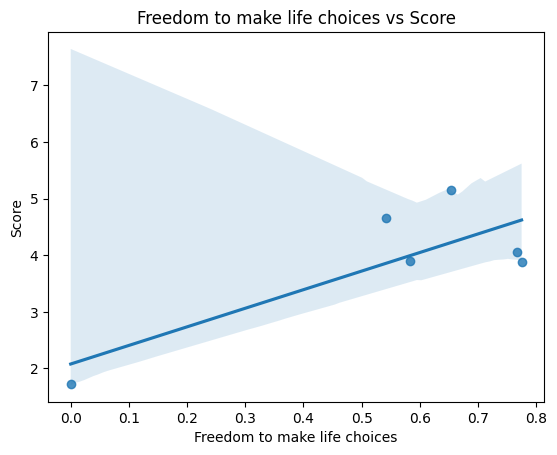

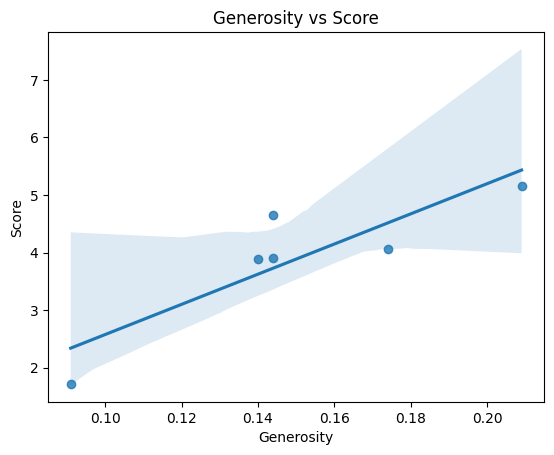

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Freedom to make life choices', 'Generosity']

for m in metrics:
    sns.regplot(x=sa_df[m], y=sa_df['score'])
    plt.xlabel(m)
    plt.ylabel('Score')
    plt.title(f'{m} vs Score')
    plt.show()


In [18]:
sa_df['GDP-Score Gap'] = sa_df['Log GDP per capita'] - sa_df['score']
print(sa_df[['Country name', 'GDP-Score Gap']])


    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
142  Afghanistan         -1.093


In [19]:
# Ascending order
gap_asc = sa_df.sort_values(by='GDP-Score Gap', ascending=True).head(3)
print('Ascending order:')
print(gap_asc[['Country name', 'GDP-Score Gap']])

# Descending order
gap_desc = sa_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)
print('\nDescending order:')
print(gap_desc[['Country name', 'GDP-Score Gap']])


Ascending order:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888

Descending order:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764


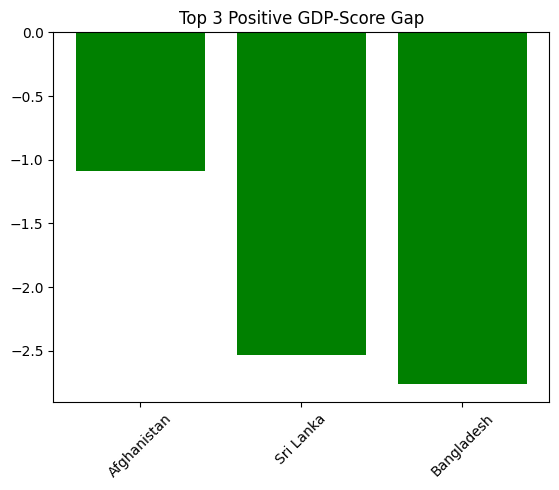

In [20]:
top_pos = sa_df.sort_values('GDP-Score Gap', ascending=False).head(3)
plt.bar(top_pos['Country name'], top_pos['GDP-Score Gap'], color='green')
plt.title("Top 3 Positive GDP-Score Gap")
plt.xticks(rotation=45)
plt.show()

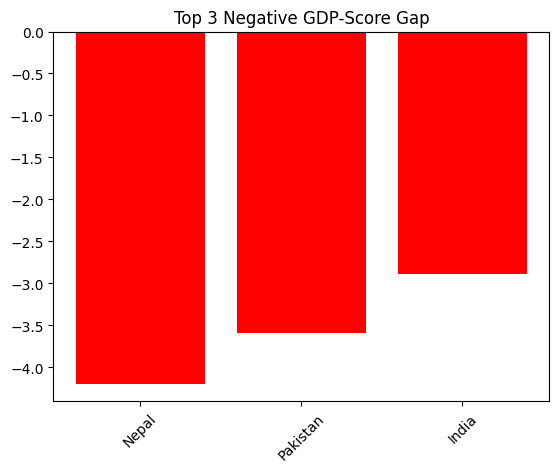

In [21]:
top_neg = sa_df.sort_values('GDP-Score Gap', ascending=True).head(3)
plt.bar(top_neg['Country name'], top_neg['GDP-Score Gap'], color='red')
plt.title("Top 3 Negative GDP-Score Gap")
plt.xticks(rotation=45)
plt.show()

In [22]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

mid_df = df[df["Country name"].isin(middle_east_countries)]
print(mid_df[["Country name", "score", "Log GDP per capita"]])

             Country name  score  Log GDP per capita
4                  Israel  7.341               1.803
12                 Kuwait  6.951               1.845
21   United Arab Emirates  6.733               1.983
27           Saudi Arabia  6.594               1.842
61                Bahrain  5.959                 NaN
91                   Iraq  5.166               1.249
99                   Iran  4.923               1.435
124                Jordan  4.186               1.262
132                 Yemen  3.561               0.671
141               Lebanon  2.707               1.377


In [23]:
sa_mean = sa_df['score'].mean()
sa_std = sa_df['score'].std()

me_mean = mid_df['score'].mean()
me_std = mid_df['score'].std()

print("South Asia - Mean:", sa_mean, "Std Dev:", sa_std)
print("Middle East - Mean:", me_mean, "Std Dev:", me_std)

South Asia - Mean: 3.895666666666667 Std Dev: 1.1770690152521504
Middle East - Mean: 5.412100000000001 Std Dev: 1.5662011684327144


In [24]:
if sa_mean > me_mean:
    print("South Asia has higher happiness Scores on average.")
elif sa_mean < me_mean:
    print("Middle East has higher happiness Scores on average.")
else:
    print("Both regions have the same average happiness Score.")

Middle East has higher happiness Scores on average.


In [25]:
print("South Asia - Top 3 countries by score:")
print(sa_df.sort_values(by='score', ascending=False)[['Country name', 'score']].head(3))

print("\nSouth Asia - Bottom 3 countries by score:")
print(sa_df.sort_values(by='score', ascending=True)[['Country name', 'score']].head(3))


South Asia - Top 3 countries by score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3 countries by score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898


In [26]:
print("\nMiddle East - Top 3 countries by score:")
print(mid_df.sort_values(by='score', ascending=False)[['Country name', 'score']].head(3))

print("\nMiddle East - Bottom 3 countries by score:")
print(mid_df.sort_values(by='score', ascending=True)[['Country name', 'score']].head(3))


Middle East - Top 3 countries by score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 countries by score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


/tmp/ipython-input-162801620.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3, x='Country name', y='score', palette='Greens')


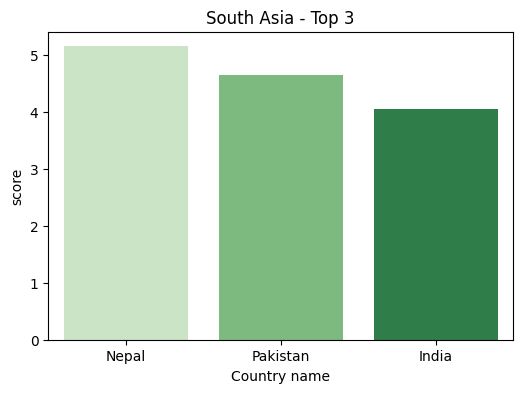

/tmp/ipython-input-162801620.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom3, x='Country name', y='score', palette='Reds')


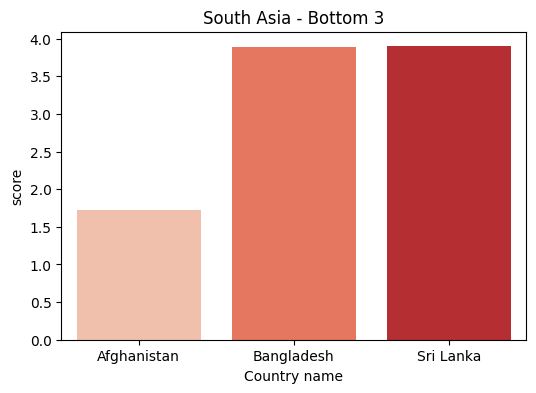

/tmp/ipython-input-162801620.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3, x='Country name', y='score', palette='Greens')


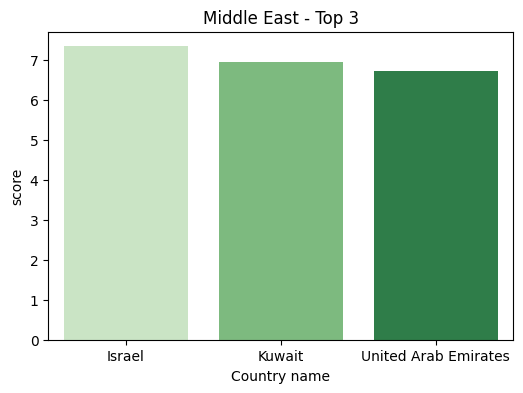

/tmp/ipython-input-162801620.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom3, x='Country name', y='score', palette='Reds')


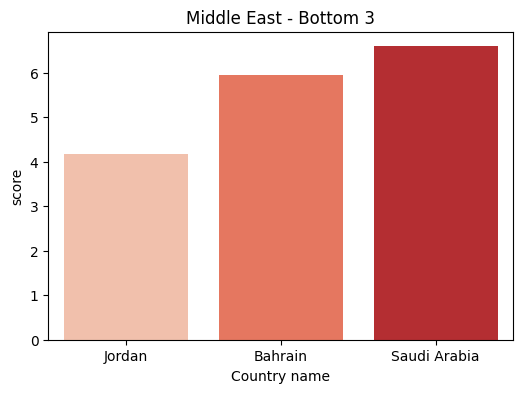

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Saudi Arabia","United Arab Emirates","Qatar","Kuwait","Oman","Bahrain","Jordan","Israel"]

regions = {'South Asia': south_asia, 'Middle East': middle_east}

for name, countries in regions.items():
    df_r = df[df['Country name'].isin(countries)]
    top3 = df_r.sort_values('score', ascending=False).head(3)
    bottom3 = df_r.sort_values('score', ascending=True).head(3)

    plt.figure(figsize=(6,4))
    sns.barplot(data=top3, x='Country name', y='score', palette='Greens')
    plt.title(f"{name} - Top 3")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.barplot(data=bottom3, x='Country name', y='score', palette='Reds')
    plt.title(f"{name} - Bottom 3")
    plt.show()


In [28]:

south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Saudi Arabia","United Arab Emirates","Qatar","Kuwait","Oman","Bahrain","Jordan","Israel"]


south_asia_df = df[df['Country name'].isin(south_asia)]
middle_east_df = df[df['Country name'].isin(middle_east)]


metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

region_comparison = pd.DataFrame({
    'Metric': metrics,
    'South Asia': [south_asia_df[m].mean() for m in metrics],
    'Middle East': [middle_east_df[m].mean() for m in metrics]
})

print(region_comparison)


                    Metric  South Asia  Middle East
0       Log GDP per capita    1.051833       1.7470
1           Social support    0.611833       1.2770
2  Healthy life expectancy    0.420333       0.6138


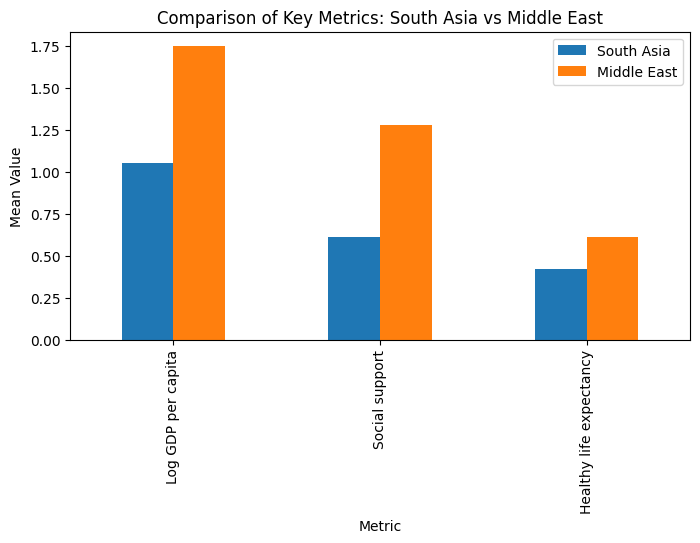

In [29]:
region_comparison.plot(
    x='Metric',
    kind='bar',
    figsize=(8,4),
    title='Comparison of Key Metrics: South Asia vs Middle East'
)
plt.ylabel("Mean Value")
plt.show()


In [30]:
# Problem 3 - Task 5
# Happiness Disparity

# Range
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Coefficient of Variation (Std / Mean)
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("South Asia Range:", sa_range)
print("Middle East Range:", me_range)

print("\nSouth Asia CV:", sa_cv)
print("Middle East CV:", me_cv)

if sa_cv > me_cv:
    print("\nSouth Asia has greater variability in happiness.")
else:
    print("\nMiddle East has greater variability in happiness.")

South Asia Range: 3.4370000000000003
Middle East Range: 3.1550000000000002

South Asia CV: 0.3021482883337427
Middle East CV: 0.28938880812119405

South Asia has greater variability in happiness.


In [31]:
# Problem 3 - Task 6
# Correlation Analysi

print("South Asia Correlations:")
print("Freedom:", south_asia_df['score'].corr(south_asia_df['Freedom to make life choices']))
print("Generosity:", south_asia_df['score'].corr(south_asia_df['Generosity']))

South Asia Correlations:
Freedom: 0.8005185224163315
Generosity: 0.874512371253192


In [32]:
#Middle East

print("\nMiddle East Correlations:")
print("Freedom:", middle_east_df['score'].corr(middle_east_df['Freedom to make life choices']))
print("Generosity:", middle_east_df['score'].corr(middle_east_df['Generosity']))



Middle East Correlations:
Freedom: 0.580991783632418
Generosity: 0.7842883977038837


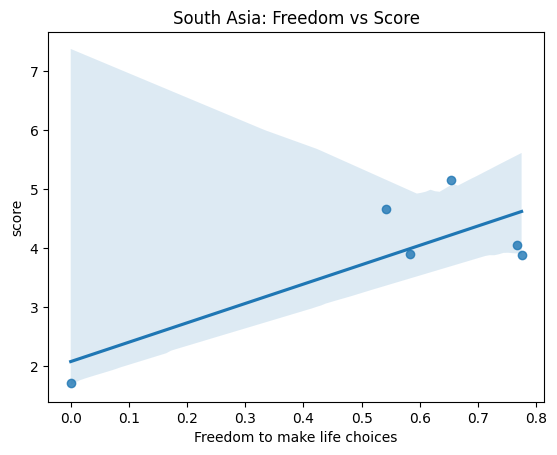

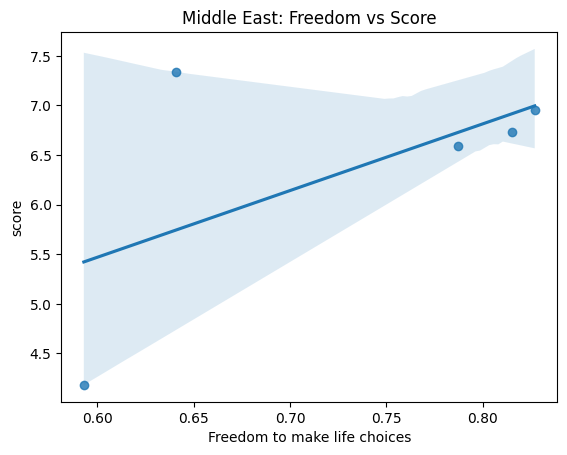

In [33]:
# Scatter Plots

# South Asia Freedom vs Score
sns.regplot(data=south_asia_df, x='Freedom to make life choices', y='score')
plt.title("South Asia: Freedom vs Score")
plt.show()

# Middle East Freedom vs Score
sns.regplot(data=middle_east_df, x='Freedom to make life choices', y='score')
plt.title("Middle East: Freedom vs Score")
plt.show()


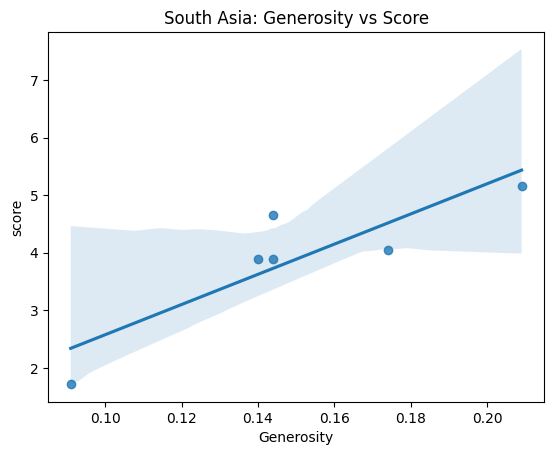

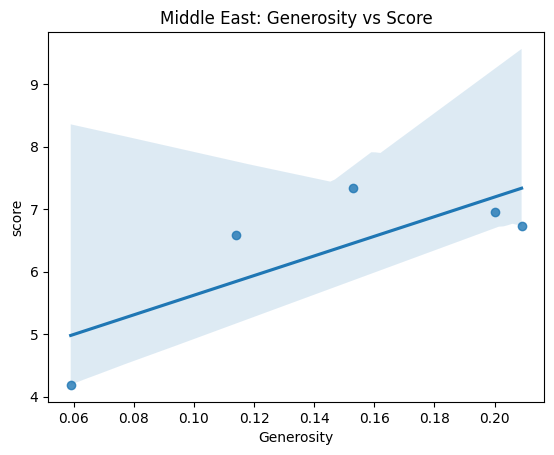

In [34]:
# South Asia Generosity vs Score
sns.regplot(data=south_asia_df, x='Generosity', y='score')
plt.title("South Asia: Generosity vs Score")
plt.show()

# Middle East Generosity vs Score
sns.regplot(data=middle_east_df, x='Generosity', y='score')
plt.title("Middle East: Generosity vs Score")
plt.show()


In [35]:
# Problem 3 - Task 7
# Outlier Detection (Both Regions)

def detect_outliers(region_df):
    Q1 = region_df['score'].quantile(0.25)
    Q3 = region_df['score'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return region_df[(region_df['score'] < lower) | (region_df['score'] > upper)]

sa_outliers = detect_outliers(south_asia_df)
me_outliers = detect_outliers(middle_east_df)

print("South Asia Outliers:")
print(sa_outliers[['Country name','score']])

print("\nMiddle East Outliers:")
print(me_outliers[['Country name','score']])

South Asia Outliers:
    Country name  score
142  Afghanistan  1.721

Middle East Outliers:
    Country name  score
124       Jordan  4.186


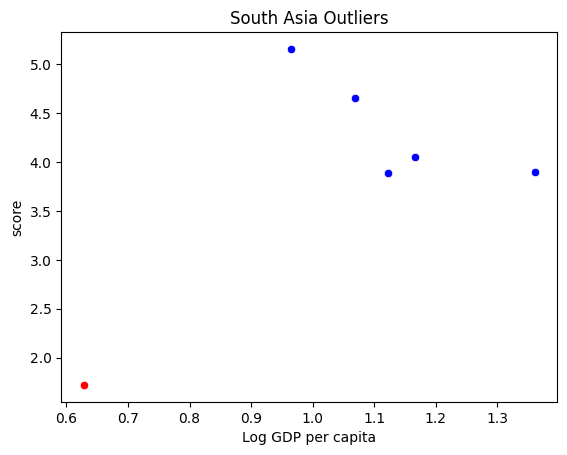

In [36]:
# Plot Outliers

# South Asia
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', color='blue')
sns.scatterplot(data=sa_outliers, x='Log GDP per capita', y='score', color='red')
plt.title("South Asia Outliers")
plt.show()


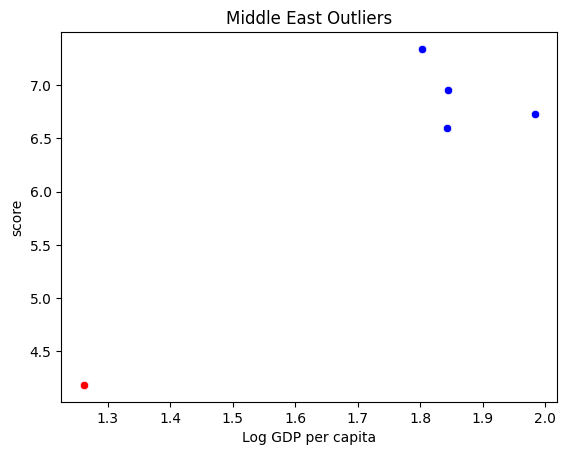

In [37]:
# Middle East
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', color='blue')
sns.scatterplot(data=me_outliers, x='Log GDP per capita', y='score', color='red')
plt.title("Middle East Outliers")
plt.show()


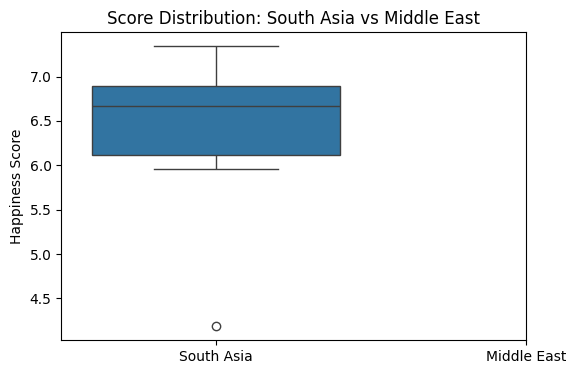

In [38]:
# Problem 3 - Task 8
# Score Distribution Comparison (Boxplot)

plt.figure(figsize=(6,4))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], orient='v')
plt.xticks([0,1], ["South Asia", "Middle East"])
plt.ylabel("Happiness Score")
plt.title("Score Distribution: South Asia vs Middle East")
plt.show()